In [2]:
from pickle import load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
def plot_file(file):
    configs, n_params_, losses_accs_ = load(open(file, 'rb'))

    losses_accs_df = list(map(lambda x: pd.DataFrame(x), losses_accs_))

    configs_df = pd.DataFrame(configs)

    heads = [2, 4, 8]
    depth = [2, 4, 8,]

    for dim_head in [32, 64, 128]:

        scores_val64 = np.zeros((3,3))
        scores_test64 = np.zeros((3,3))
        scores_val = np.zeros((3,3))
        scores_test = np.zeros((3,3))

        for i, config in enumerate(configs):
            if config['dim_head'] == dim_head and config['dim'] == 64:
                scores_val64[heads.index(config['heads']), depth.index(config['depth'])] =  losses_accs_df[i].val_acc.max()
                scores_test64[heads.index(config['heads']), depth.index(config['depth'])] =  losses_accs_df[i].test_acc[losses_accs_df[i].val_acc.argmax()]
            if config['dim_head'] == dim_head and config['dim'] == 14*20:
                scores_val[heads.index(config['heads']), depth.index(config['depth'])] =  losses_accs_df[i].val_acc.max()
                scores_test[heads.index(config['heads']), depth.index(config['depth'])] =  losses_accs_df[i].test_acc[losses_accs_df[i].val_acc.argmax()]

        fig, axes = plt.subplots(figsize=(8*2, 4), ncols=4)
        for idx, scores in enumerate([scores_val64, scores_test64, scores_val, scores_test]):
            ax = axes[idx]
            m = ax.imshow(scores, interpolation='nearest',  vmin=.5, vmax=.85)#cmap=plt.cm.hot)
            ax.set_ylabel('heads')
            ax.set_xlabel('depth')

            ax.xaxis.set_major_locator(ticker.FixedLocator(np.arange(len(heads))))
            ax.xaxis.set_major_formatter(ticker.FixedFormatter(heads))
            ax.yaxis.set_major_locator(ticker.FixedLocator(np.arange(len(depth))))
            ax.yaxis.set_major_formatter(ticker.FixedFormatter(depth))

            ax.set_title(f'{"Training" if idx % 2 == 0 else "Test"}\ndim_head={dim_head},dim={64 if idx < 2 else 14*20}\nhidden=2*dim')
            for i in range(len(heads)):
                for j in range(len(depth)):
                    text = ax.text(j, i, f"{scores[i, j]*100:.2f}%",
                                   ha="center", va="center", color="w")

        fig.subplots_adjust(right=0.8)
        cbar_ax = fig.add_axes([0.85, 0.1, 0.015, 0.85])
        fig.colorbar(m, cax=cbar_ax)

        plt.show()

In [12]:
def plot_file_losses(file):
    configs, n_params_, losses_accs_ = load(open(file, 'rb'))

    losses_accs_df = list(map(lambda x: pd.DataFrame(x), losses_accs_))

    configs_df = pd.DataFrame(configs)

    heads = [2, 4, 8]
    depth = [2, 4, 8,]

    for dim_head in [32, 64, 128]:

        scores_val64 = np.zeros((3,3))
        scores_test64 = np.zeros((3,3))
        scores_val = np.zeros((3,3))
        scores_test = np.zeros((3,3))

        for i, config in enumerate(configs):
            if config['dim_head'] == dim_head and config['dim'] == 64:
                scores_val64[heads.index(config['heads']), depth.index(config['depth'])] =  losses_accs_df[i].val_loss.max()
                scores_test64[heads.index(config['heads']), depth.index(config['depth'])] =  losses_accs_df[i].test_loss[losses_accs_df[i].val_loss.argmax()]
            if config['dim_head'] == dim_head and config['dim'] == 14*20:
                scores_val[heads.index(config['heads']), depth.index(config['depth'])] =  losses_accs_df[i].val_loss.max()
                scores_test[heads.index(config['heads']), depth.index(config['depth'])] =  losses_accs_df[i].test_loss[losses_accs_df[i].val_loss.argmax()]

        fig, axes = plt.subplots(figsize=(8*2, 4), ncols=4)
        for idx, scores in enumerate([scores_val64, scores_test64, scores_val, scores_test]):
            ax = axes[idx]
            m = ax.imshow(scores, interpolation='nearest',  vmin=1, vmax=4)#cmap=plt.cm.hot)
            ax.set_ylabel('heads')
            ax.set_xlabel('depth')

            ax.xaxis.set_major_locator(ticker.FixedLocator(np.arange(len(heads))))
            ax.xaxis.set_major_formatter(ticker.FixedFormatter(heads))
            ax.yaxis.set_major_locator(ticker.FixedLocator(np.arange(len(depth))))
            ax.yaxis.set_major_formatter(ticker.FixedFormatter(depth))

            ax.set_title(f'{"Training" if idx % 2 == 0 else "Test"}\ndim_head={dim_head},dim={64 if idx < 2 else 14*20}\nhidden=2*dim')
            for i in range(len(heads)):
                for j in range(len(depth)):
                    text = ax.text(j, i, f"{scores[i, j]:.2f}",
                                   ha="center", va="center", color="w")

        fig.subplots_adjust(right=0.8)
        cbar_ax = fig.add_axes([0.85, 0.1, 0.015, 0.85])
        fig.colorbar(m, cax=cbar_ax)

        plt.show()

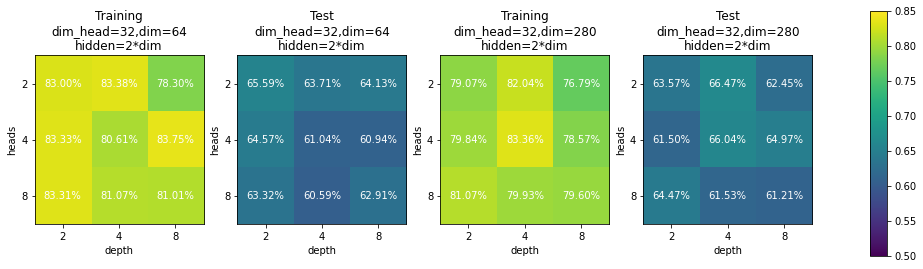

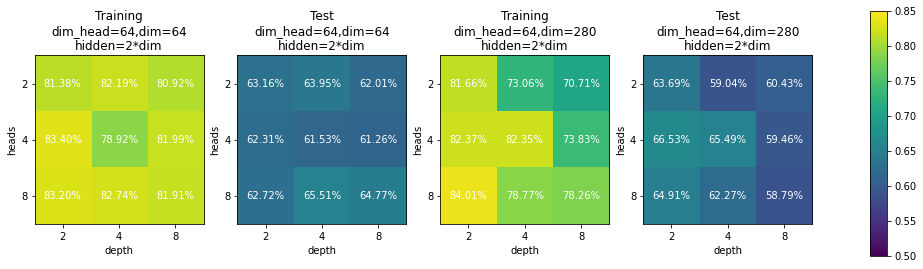

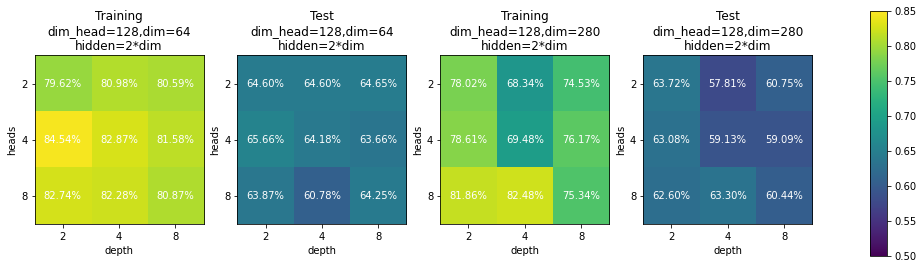

In [4]:
plot_file('subject=5,sess=1,epochs=100,lr=1e-3,opt=adam')

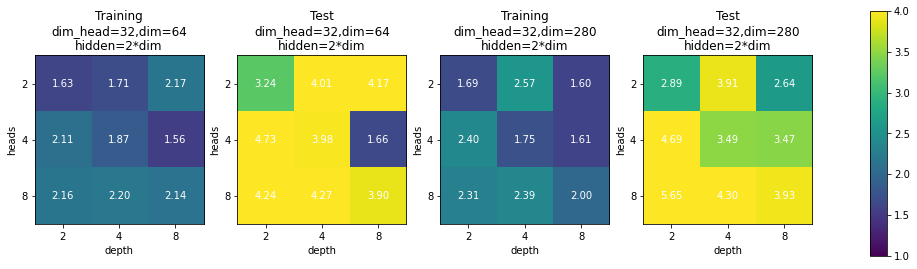

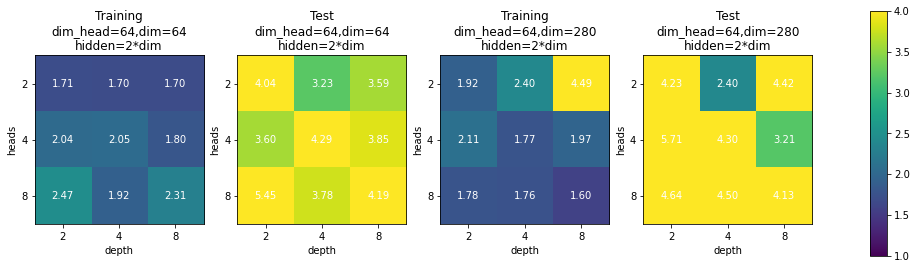

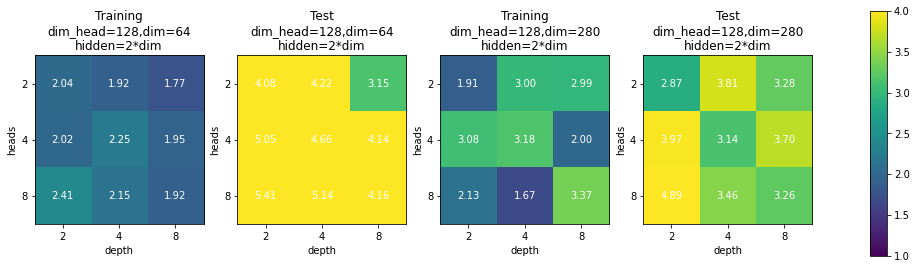

In [13]:
plot_file_losses('subject=5,sess=1,epochs=100,lr=1e-3,opt=adam')

In [106]:
configs, n_params_, losses_accs_ = load(open('subject=5,sess=5,epochs=100,lr=1e-3,opt=adam', 'rb'))
i = 6
configs[i], losses_accs_[i][-1], configs[i+9], losses_accs_[i+9][-1]

({'channels': 14,
  'depth': 2,
  'dim': 64,
  'dim_head': 128,
  'dropout': 0.2,
  'emb_dropout': 0,
  'heads': 2,
  'image_size': (1, 300),
  'num_classes': 8,
  'patch_size': (1, 20),
  'pool': 'cls',
  'sessions': 5,
  'use_cls_token': True,
  'mlp_dim': 128},
 {'train_loss': 0.09589604750275611,
  'train_acc': 0.9638468027114868,
  'val_loss': 1.274152908636176,
  'val_acc': 0.766109049320221,
  'test_loss': 1.434795406460762,
  'test_acc': 0.7790888547897339},
 {'channels': 14,
  'depth': 2,
  'dim': 280,
  'dim_head': 128,
  'dropout': 0.2,
  'emb_dropout': 0,
  'heads': 2,
  'image_size': (1, 300),
  'num_classes': 8,
  'patch_size': (1, 20),
  'pool': 'cls',
  'sessions': 5,
  'use_cls_token': True,
  'mlp_dim': 560},
 {'train_loss': 0.5250349044799805,
  'train_acc': 0.8076984286308289,
  'val_loss': 1.0443391281625498,
  'val_acc': 0.6885721683502197,
  'test_loss': 1.1798110395669936,
  'test_acc': 0.68776935338974})

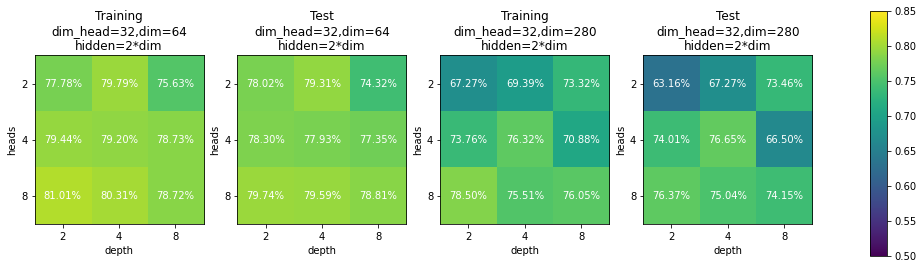

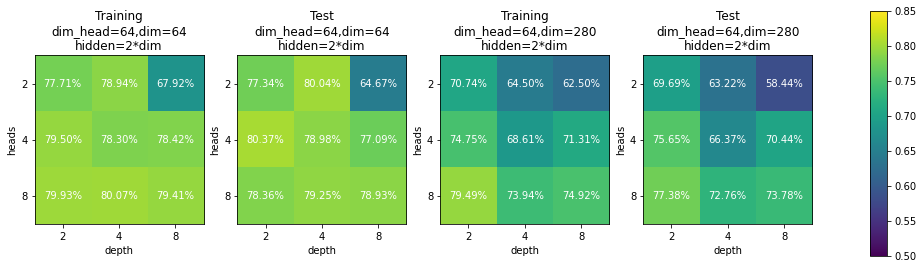

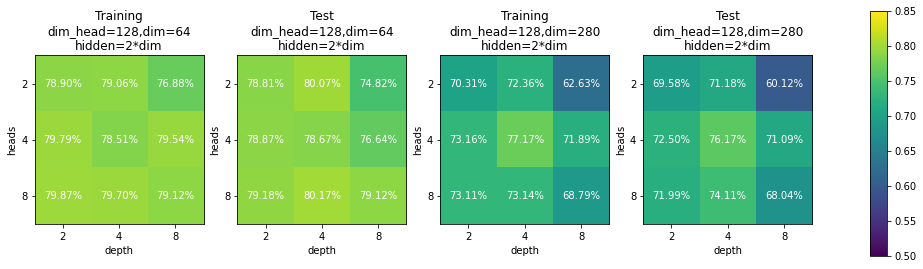

In [79]:
plot_file('subject=5,sess=5,epochs=100,lr=1e-3,opt=adam')

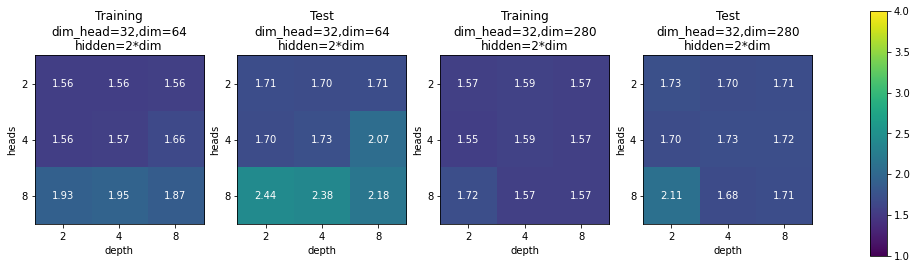

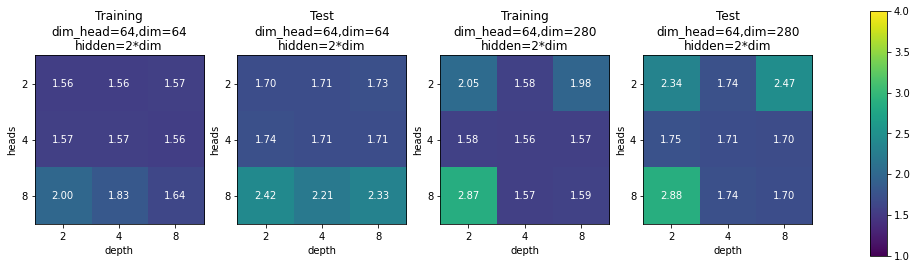

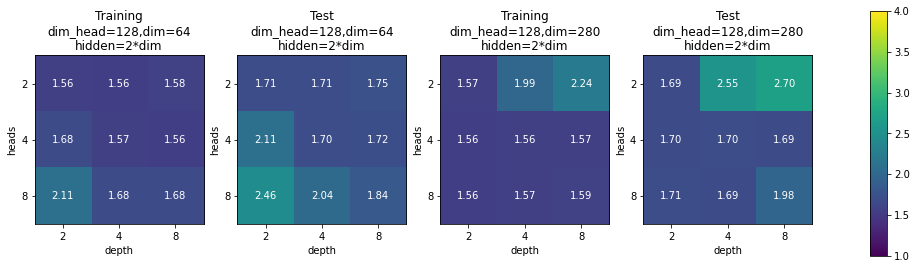

In [14]:
plot_file_losses('subject=5,sess=5,epochs=100,lr=1e-3,opt=adam')